In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# Importing libraries
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
from brokenaxes import brokenaxes
import seaborn as sns

from src.models import parameter_learning as lfi
from src.models import build_model as build
from src.models import model_schemata as schema
from src.models import inference as inf
from src.visualization import visualize as viz

In [57]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

#### Evaluation of learning process

#### Evaluation of learned parameters

In [58]:
path_e = f'models/ebdt_data/sub_network/e_model/e_model_exp2_100i.pl'
path_n = f'models/ebdt_data/sub_network/n_model/n_model_exp1_1i.pl'
path_p = f'models/ebdt_data/sub_network/p_model/p_model_exp11_200i.pl'
result_dict = {}
result_dict['e_model'] = lfi.extract_params_from_model_file(path_e)
result_dict['n_model'] = lfi.extract_params_from_model_file(path_n)
result_dict['p_model'] = lfi.extract_params_from_model_file(path_p)

In [59]:
#remove duplicates, keep last occurence
for predicate, data in result_dict['e_model'].items():
    result_dict['e_model'][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)
for predicate, data in result_dict['n_model'].items():
    result_dict['n_model'][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)
for predicate, data in result_dict['p_model'].items():
    result_dict['p_model'][predicate] = lfi.learned_parameters_to_df(predicate, data).reset_index(drop=True)

Average JSD per experiment pair
* calculate jsd for every pair where overlap. then calculate average to for similarity (matrix of experiments)
* calculate average jsd for individual predicates e.g. occupancy

In [69]:
experiments = ['e_model', 'n_model', 'p_model']
predicates = ['e_activity', 'act_dec', 'act_inc', 'occ_dec', 'occ_inc', 'p_occupancy', 'p_function']

jsd_dict = {}

# Iterate over predicates
for pred in predicates:
    jsd_dict[pred] = lfi.compare_jsds(pred, experiments, result_dict)

In [64]:
experiments = ['e_model', 'n_model']
predicates = ['e_activity', 'act_dec', 'act_inc', 'p_occupancy', 'p_function']
average_jsd_matrix = viz.calc_average_jsd_heatmap(experiments, predicates, jsd_dict)

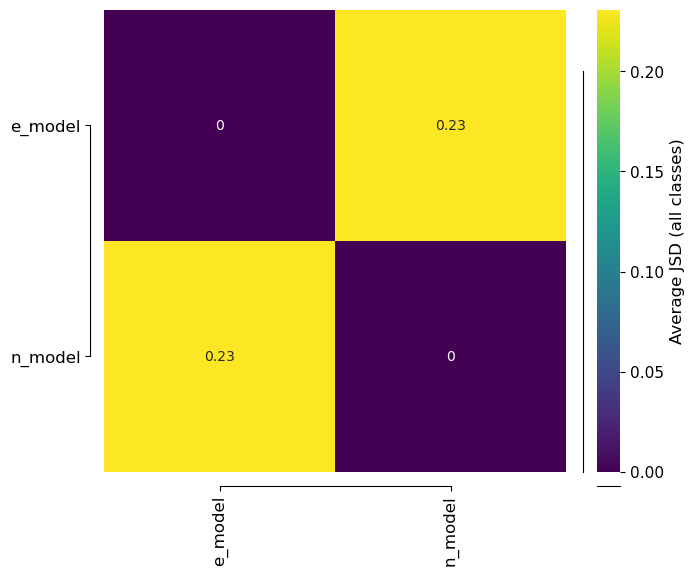

In [65]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(average_jsd_matrix)

In [66]:
p_occupancy_jsd_matrix = viz.calc_individual_predicate_jsd_heatmap(experiments, 'e_activity', jsd_dict)

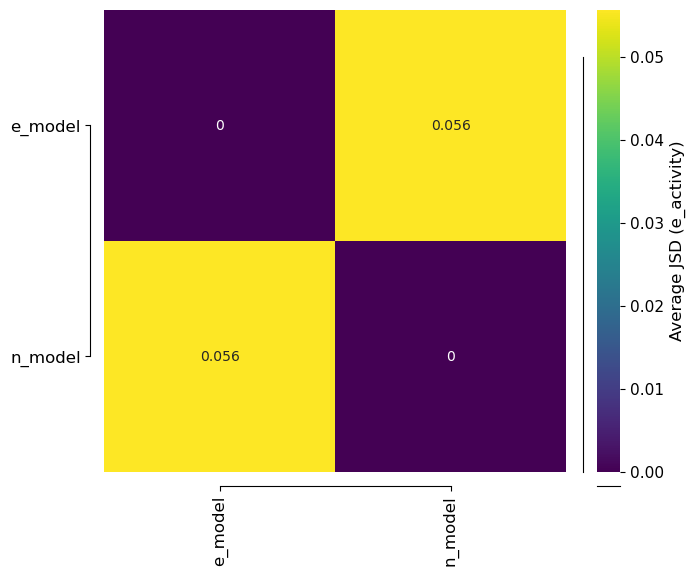

In [67]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(p_occupancy_jsd_matrix, score_type='Average JSD (e_activity)')

In [70]:
experiments = ['p_model', 'n_model']
predicates = ['e_activity', 'occ_dec', 'occ_inc', 'p_occupancy']
average_jsd_matrix = viz.calc_average_jsd_heatmap(experiments, predicates, jsd_dict)

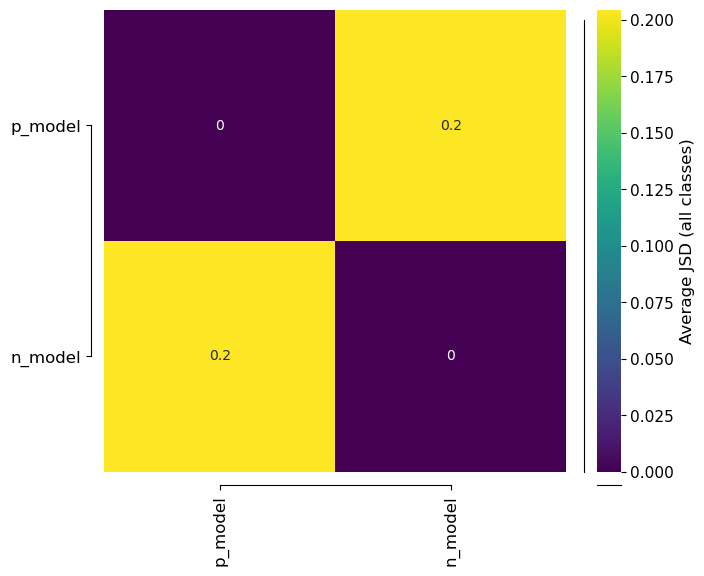

In [71]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(average_jsd_matrix)

In [72]:
p_occupancy_jsd_matrix = viz.calc_individual_predicate_jsd_heatmap(experiments, 'p_occupancy', jsd_dict)

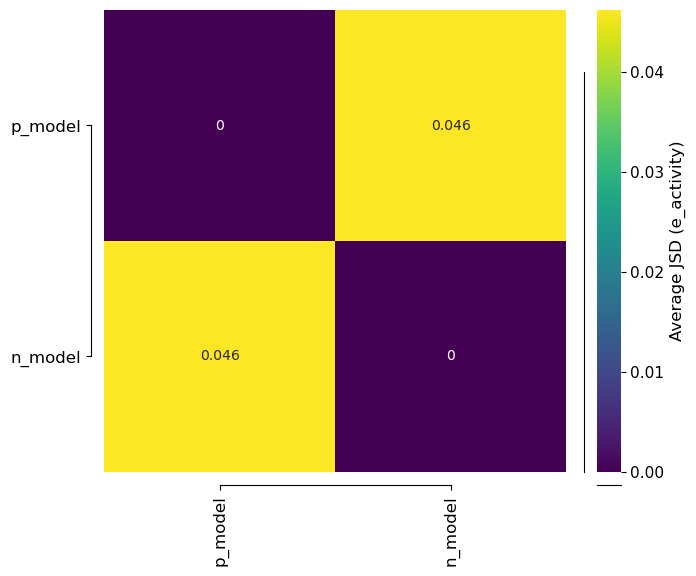

In [73]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(p_occupancy_jsd_matrix, score_type='Average JSD (e_activity)')

In [74]:
max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, result_dict)

In [75]:
p_occupancy_overlap_matrix = viz.calc_individual_predicate_overlap_heatmap(experiments, 'p_occupancy', max_dict)

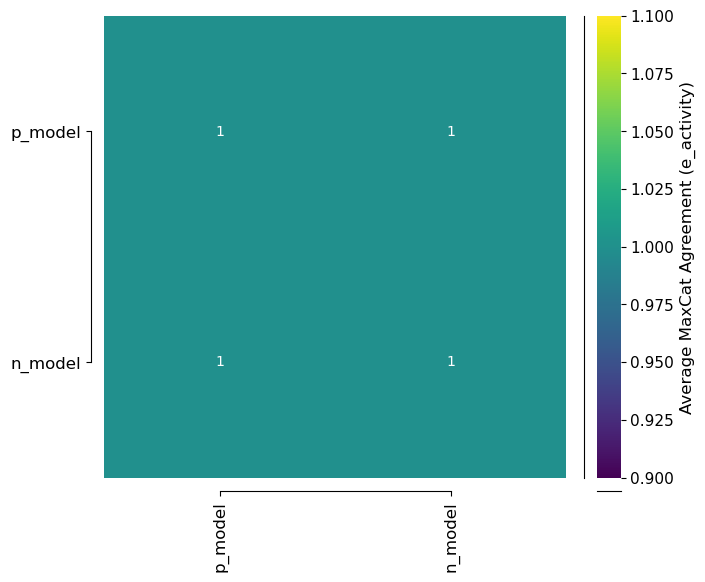

In [76]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(p_occupancy_overlap_matrix, score_type='Average MaxCat Agreement (e_activity)')

Average fraction of MaxMatch per experiment pair

In [33]:
experiments = ['e_model', 'n_model']
predicates = ['e_activity', 'act_dec', 'act_inc', 'p_occupancy', 'p_function']

max_dict = {}

# Iterate over predicates
for pred in predicates:
    max_dict[pred] = lfi.compare_max_categories(pred, experiments, result_dict)

In [34]:
predicates = ['e_activity', 'act_dec', 'act_inc', 'p_occupancy', 'p_function']
average_overlap_matrix = viz.calc_average_overlap_heatmap(experiments, predicates, max_dict)

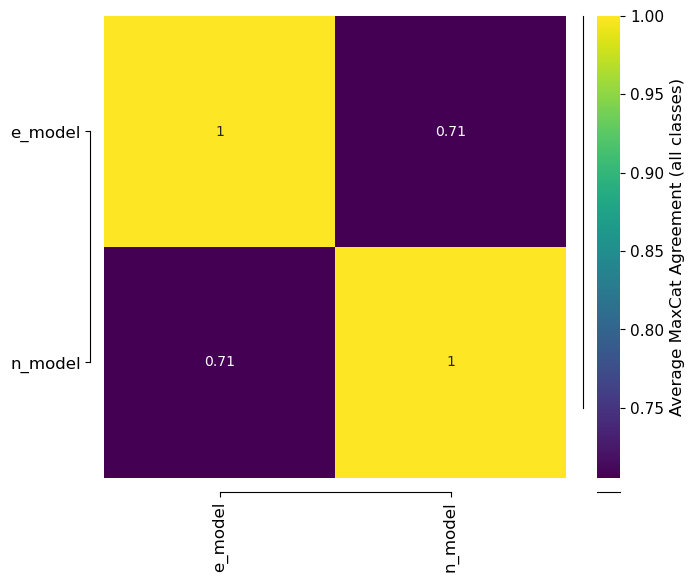

In [35]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(average_overlap_matrix, score_type='Average MaxCat Agreement (all classes)')

In [36]:
p_occupancy_overlap_matrix = viz.calc_individual_predicate_overlap_heatmap(experiments, 'e_activity', max_dict)

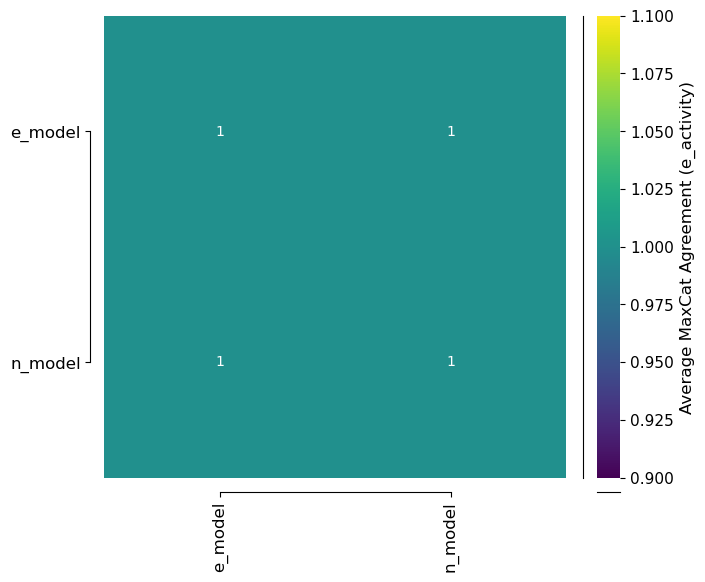

In [37]:
# Assuming average_jsd_matrix is your JSD matrix
sns.reset_orig()
viz.plot_clustered_heatmap(p_occupancy_overlap_matrix, score_type='Average MaxCat Agreement (e_activity)')

#### Compare AUC (all experiments)

In [21]:
p_fc = pd.read_csv('data/processed/ebdt_data/sub_network_e/p_fc.csv')

In [22]:
p_fc['p_base'] = 1 - p_fc['p_dec'] - p_fc['p_inc']
p_fc.loc[p_fc['p_base'] < 0, 'p_base'] = 0


In [23]:
p_fc

,phosphosite,sample,value,prob,p_dec,p_inc,p_base
0,ABL1(S569),AZD5438,inc,0.657336,0.00100,0.657336,0.341664
1,ABL1(S718),AZD5438,inc,0.422202,0.00100,0.422202,0.576798
2,ABL1(T735),AZD5438,inc,0.998006,0.00100,0.998006,0.000994
3,HIPK2(Y361),AZD5438,dec,0.458100,0.45810,0.001000,0.540900
4,PTK2(S29),AZD5438,dec,0.451380,0.45138,0.001000,0.547620
...,...,...,...,...,...,...,...
666,PTK2(S843),Torin,inc,0.997989,0.00100,0.997989,0.001011
667,PTK2(S843),Trametinib,inc,0.998004,0.00100,0.998004,0.000996
668,PTK2(S843),U73122,dec,0.001000,0.00100,0.001000,0.998000
669,PTK2(S843),Ulixertinib,dec,0.001000,0.00100,0.001000,0.998000


In [24]:
result_dict['exp1_100i']['p_occupancy']

value,phosphosite,sample,line,p_dec,p_inc,p_base
0,ABL1(S569),AC220,"p::p_occupancy(""ABL1(S569)"",""AC220"",dec); p::p...",0.0,1.0,0.0
1,ABL1(S569),AT13148,"p::p_occupancy(""ABL1(S569)"",""AT13148"",dec); p:...",0.0,1.0,0.0
2,ABL1(S569),AZ20,"p::p_occupancy(""ABL1(S569)"",""AZ20"",dec); p::p_...",0.0,1.0,0.0
3,ABL1(S569),AZD1480,"p::p_occupancy(""ABL1(S569)"",""AZD1480"",dec); p:...",0.0,1.0,0.0
4,ABL1(S569),AZD3759,"p::p_occupancy(""ABL1(S569)"",""AZD3759"",dec); p:...",1.0,0.0,0.0
...,...,...,...,...,...,...
666,SRC(S75),Torin,"p::p_occupancy(""SRC(S75)"",""Torin"",dec); p::p_o...",1.0,0.0,0.0
667,SRC(S75),Trametinib,"p::p_occupancy(""SRC(S75)"",""Trametinib"",dec); p...",0.0,1.0,0.0
668,SRC(S75),U73122,"p::p_occupancy(""SRC(S75)"",""U73122"",dec); p::p_...",0.0,1.0,0.0
669,SRC(S75),Ulixertinib,"p::p_occupancy(""SRC(S75)"",""Ulixertinib"",dec); ...",1.0,0.0,0.0


In [25]:
analysis_dicts_0 = inf.prep_experiments_for_auc(result_dict, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0)

AUC Plots

In [26]:
y_onehot_test_list_0 = []
y_score_list_0 = []
experiment_names = []
for exp in analysis_dicts_0.keys():
    y_onehot_test_list_0.append(analysis_dicts_0[exp]['y_onehot_test'])
    y_score_list_0.append(analysis_dicts_0[exp]['y_score'])
    experiment_names.append(exp)

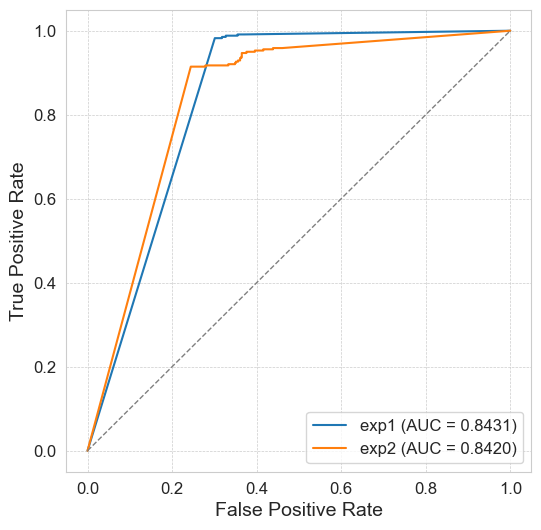

In [27]:
auc_df = viz.plot_micro_average_roc_seaborn(y_onehot_test_list_0, y_score_list_0, experiment_names)

In [28]:
analysis_dicts_80 = inf.prep_experiments_for_auc(result_dict, p_fc, result_type='p_occupancy', y_true_type='p_fc', threshold=0.8)
y_onehot_test_list_80 = []
y_score_list_80 = []
experiment_names = []
for exp in analysis_dicts_80.keys():
    y_onehot_test_list_80.append(analysis_dicts_80[exp]['y_onehot_test'])
    y_score_list_80.append(analysis_dicts_80[exp]['y_score'])
    experiment_names.append(exp)

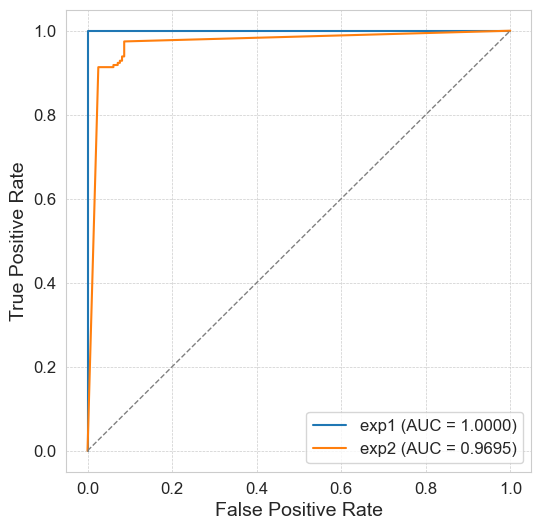

In [29]:
auc_df = viz.plot_micro_average_roc_seaborn(y_onehot_test_list_80, y_score_list_80, experiment_names)

#### Evaluation learned parameters: exp5 (ksea) vs exp10 (ksea pen)

In [30]:
# Extracting data from your analysis dictionary
x = analysis_dicts_0['exp1_100i']['analysis_dataframe']['prob']
y = analysis_dicts_0['exp1_100i']['analysis_dataframe']['JSD']
mask_no_match = analysis_dicts_0['exp1_100i']['analysis_dataframe']['MaxMatch'] == 0

In [31]:
# Extracting data from your analysis dictionary
x = analysis_dicts_0['exp2_100i']['analysis_dataframe']['prob']
y = analysis_dicts_0['exp2_100i']['analysis_dataframe']['JSD']
mask_no_match = analysis_dicts_0['exp2_100i']['analysis_dataframe']['MaxMatch'] == 0

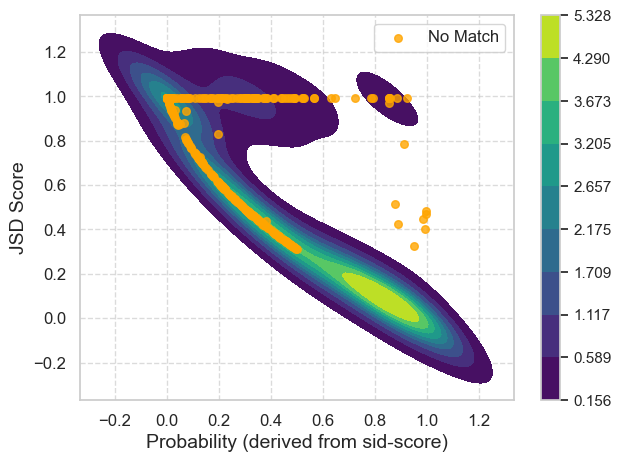

In [41]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(7, 5), dpi=100)

# Create the kdeplot
sns.kdeplot(x=x, y=y, cmap='viridis', fill=True, levels=10, cbar=True)

# Scatter plot for 'MaxMatch' == 0 (Non Matches)
plt.scatter(x[mask_no_match], y[mask_no_match], c='orange', s=30, alpha=0.8, label='No Match')

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding labels, title, and legend
plt.xlabel('Probability (derived from sid-score)', fontsize=14)
plt.ylabel('JSD Score', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Enhance readability
plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjusts the plot to ensure everything fits well

# Display the plot
plt.show()

In [32]:
# Data extraction
data1 = analysis_dicts_0['exp1_100i']['analysis_dataframe']['JSD']
data2 = analysis_dicts_0['exp2_100i']['analysis_dataframe']['JSD']

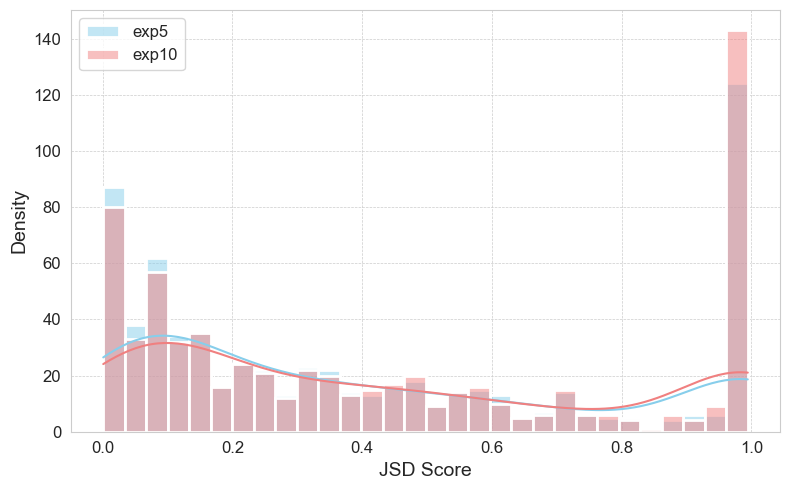

In [33]:
# Set a theme for seaborn for a nicer look
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the KDE for data1
sns.histplot(data1, bins=30, kde=True, color='skyblue', linewidth=2, label='exp5')

# Plot the KDE for data2
sns.histplot(data2, bins=30, kde=True, color='lightcoral', linewidth=2, label='exp10')  # Change color and label as appropriate

# Add titles, labels, and legend
plt.xlabel('JSD Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

#### Evaluation pf learned interactions

In [34]:
result_dict['exp1_100i']['p_function']
res1 = result_dict['exp1_100i']['p_function'][['phosphosite', 'function', 'probability']]

In [35]:
res1

,phosphosite,function,probability
0,ABL1(S718),p_dec,0.351277
1,ABL1(S718),p_inc,0.648723
2,PTK2(S29),p_dec,0.467978
3,PTK2(S29),p_inc,0.532022
4,PTK2(S722),p_dec,0.371595
5,PTK2(S722),p_inc,0.628405
6,PTPRG(S995),p_dec,0.005922
7,PTPRG(S995),p_inc,0.994078


In [36]:
result_dict['exp2_100i']['p_function']
res2 = result_dict['exp2_100i']['p_function'][['phosphosite', 'function', 'probability']]
res2

,phosphosite,function,probability
0,ABL1(S718),p_dec,0.392951
1,ABL1(S718),p_inc,0.607049
2,PTK2(S29),p_dec,0.507563
3,PTK2(S29),p_inc,0.492437
4,PTK2(S722),p_dec,0.379900
5,PTK2(S722),p_inc,0.620100
6,PTPRG(S995),p_dec,0.005922
7,PTPRG(S995),p_inc,0.994078


In [37]:
# Separate the data into two datasets for the different functions
p_inc_data = res2[res2['function'] == 'p_inc']
p_dec_data = res2[res2['function'] == 'p_dec']

# Invert the probabilities for p_dec to display them on the left
p_dec_data['probability'] *= -1

# Concatenate the data back for plotting
plot_data = pd.concat([p_dec_data, p_inc_data])

/var/folders/l3/vxqxpwf10_x9jp7g4_x9yy9m0000gn/T/ipykernel_8248/279925997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dec_data['probability'] *= -1


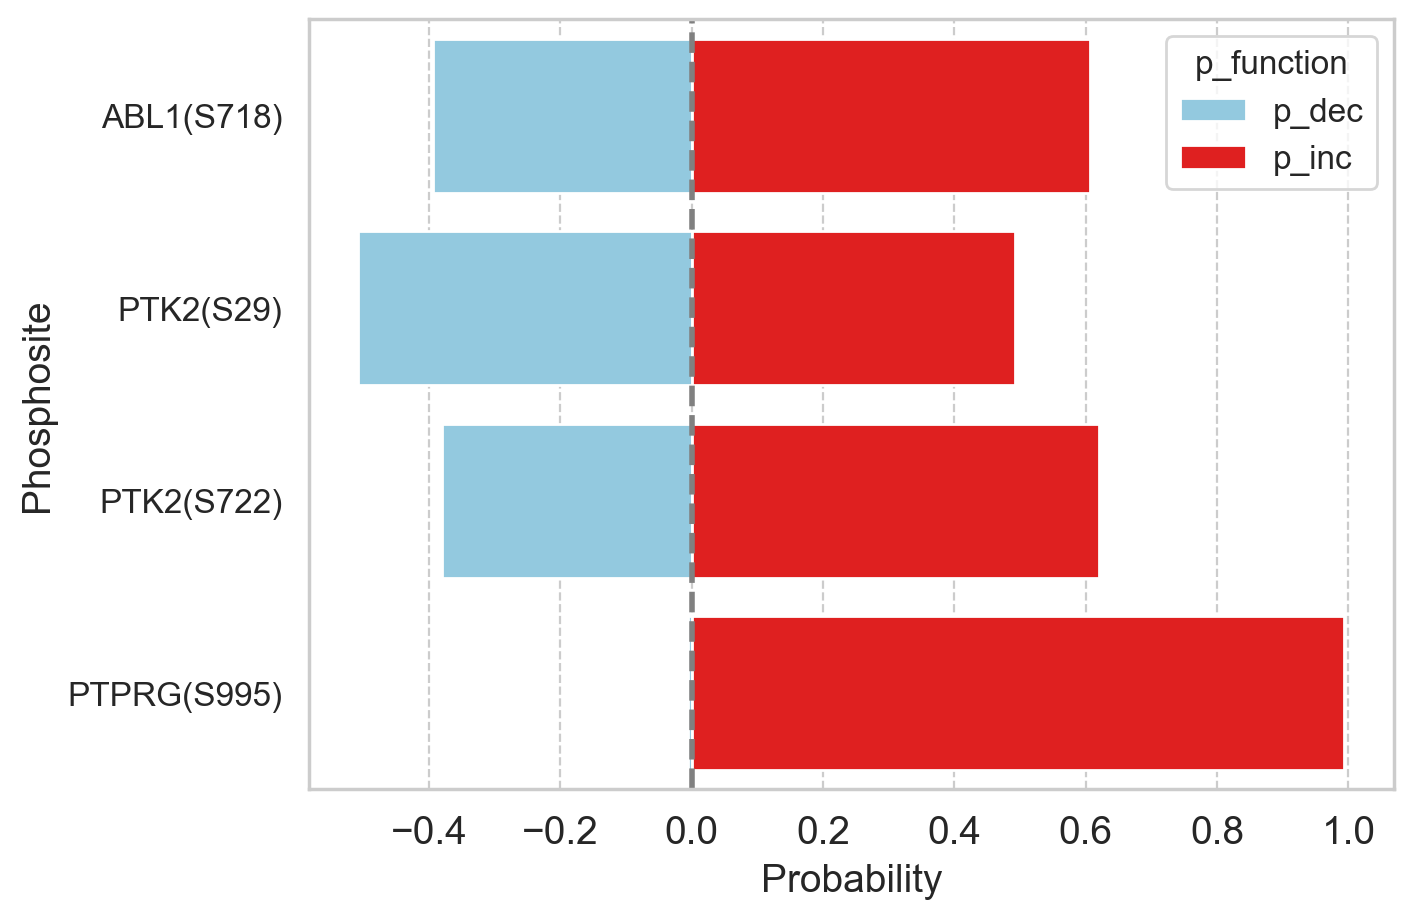

In [38]:
sns.set(style="whitegrid")  # Start with a white grid style
# Create the barplot with specified colors
plt.figure(figsize=(7, 5), dpi=200)
barplot = sns.barplot(x='probability', y='phosphosite', data=plot_data, hue='function',
                      dodge=False, palette={'p_inc': 'red', 'p_dec': 'skyblue'})

# Adjust the legend
plt.legend(title='p_function', loc='upper right', fontsize=12)

plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=12)

# Set labels
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Phosphosite', fontsize=14)

# Draw a vertical line at x=0
plt.axvline(x=0, color='grey', linewidth=2, alpha=1, linestyle='--')
plt.grid(True, axis='x', linestyle='--', linewidth=0.8)

# Show the plot
plt.show()